<a href="https://colab.research.google.com/github/EduGod0y/Computational-Methods/blob/main/Integra%C3%A7%C3%A3o_num%C3%A9rica_SIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Relatório sobre o Modelo SIR com Euler Cromer**
##Metcomp B - 26/08/21
##Eduardo Godoy da Silveira - 00313426

###Integre numericamente o sistema de equações do modelo SIR usando método de Euler-Cromer. Para simplificar a exploração do modelo use como parâmetros $\gamma=0.5$  e varie o parâmetro $\beta$ e as condições iniciais.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
def func(s0,i0,r0,g,B,t0,tf,dt=0.1):
  tamanho = math.ceil((tf-t0)/dt)
  N = np.zeros(tamanho)
  S = np.zeros(tamanho)
  I = np.zeros(tamanho)
  R = np.zeros(tamanho)

  N[0]= s0 + i0 + r0
  S[0]= s0
  I[0] = i0
  R[0] = r0 

  for i in range(1,tamanho):
    S[i] = S[i-1] - (dt* B * S[i-1] *I[i-1])/N[i-1] 
    I[i] = I[i-1] + (dt*B*S[i-1]*I[i-1])/(N[i-1]) - dt*g*I[i-1]
    R[i] = R[i-1] + dt*g*I[i-1]
    N[i] = S[i] + I[i] + R[i]
  return  N,S,I,R 

###1) Use a solução analítica para estimar um valor para $\Delta t$. Para testar se seu $\Delta t$ está adequado, use $\beta=1$ , $S=99$. , $I=1.$ e $R=0.$ Verifique se $N$ se conserva em torno de $1\%$.

A partir da solução analítica:
$$
\frac{\Delta I}{\Delta t} = I(\beta\frac{S_0}{N}-\gamma)
$$ 

$$
{I_1 - I_0} =  I_1(\beta\frac{S_0}{N}-\gamma)\Delta t
$$

$$
I_1 = I_1(\beta\frac{S_0}{N}-\gamma)\Delta t + I_0
$$
$$
I_1(1 - (\beta\frac{S_0}{N}-\gamma)\Delta t) = I_0
$$
Se fizermos para $I_n$
$$
I_1 =  \frac{I_0}{(1 - (\beta\frac{S_0}{N}-\gamma)\Delta t)}
$$
Se substituirmos $I_1$ por $I_2$ podemos ver que para $I_n$:

$$
\boxed{I_n =  \frac{I_0}{(1 - (\beta\frac{S_0}{N}-\gamma)\Delta t)^n}}
$$

Como $I_{\rightarrow\infty} \rightarrow 0$:

$$
|1 - (\beta\frac{S_0}{N}-\gamma)\Delta t| \rightarrow \infty
$$
Com as condições iniciais:
$$
|1 - (1\frac{99}{100}-0.5)\Delta t| \rightarrow \infty
$$

$$
|1 - 0.49\Delta t| \rightarrow \infty
$$
Como a solução $\Delta t < 0$ não tem sentido físico:
$$
\boxed{\Delta t \rightarrow 0}
$$


In [ ]:
N1, S1, I1 , R1 = func(s0=99,i0=1,r0=0,g=0.5,B=1,t0=0,tf=100)
for i in N1:
  print('{0:.15f}'.format(i))

100.000000000000000
100.000000000000000
100.000000000000000
99.999999999999986
100.000000000000000
99.999999999999986
100.000000000000000
100.000000000000014
100.000000000000000
100.000000000000000
100.000000000000000
100.000000000000000
100.000000000000000
100.000000000000014
100.000000000000000
100.000000000000000
100.000000000000000
100.000000000000000
100.000000000000000
100.000000000000014
100.000000000000000
100.000000000000000
100.000000000000000
100.000000000000000
100.000000000000000
100.000000000000000
100.000000000000014
100.000000000000014
100.000000000000028
100.000000000000028
100.000000000000014
100.000000000000014
100.000000000000014
100.000000000000014
100.000000000000014
100.000000000000028
100.000000000000028
100.000000000000014
100.000000000000014
100.000000000000028
100.000000000000028
100.000000000000014
100.000000000000028
100.000000000000028
100.000000000000028
100.000000000000014
100.000000000000014
100.000000000000028
100.000000000000014
100.000000000000028
10

Com um $\Delta t = 0.1$ observamos que o N flutua ao redor de 100 com uma imprecisão muito abaixo de 1%. 

###2) A partir da solução analítica encontre valores iniciais de $S$ e $R$ para os quais a infecção não se propaga. Integre o sistema a partir desses valores e mostre os gráficos respectivos de $S,I,R$ . Mantenha os valores de $\beta$ e $\gamma$ do item 1.

Como demonstrado em aula, a partir da solução analítica para que haja cresimento de infectados:
$$
\frac{S_0}{N}>\frac{\gamma}{\beta}
$$
Então para que a infecção não se propague com $\gamma=0.5$ e $\beta=1$
$$
\frac{S_0}{N} \leq 0.5
$$
Como $N = S_0 + I_0 + R_0$
$$
S_0 \leq 0.5(S_0 + I_0 + R_0)
$$

$$
0.5S_0 \leq 0.5(R_0 + I_0)
$$

$$
\boxed{S_0 \leq R_0 + 1}
$$

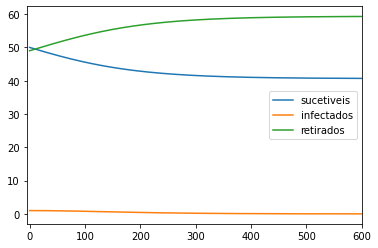

In [ ]:
N2 , S2 , I2 , R2 = func(s0=49,i0=1,r0=50,g=.5,B=1,t0=0,tf=100)
plt.plot(S2,label='sucetiveis')
plt.plot(I2,label='infectados')
plt.plot(R2,label='retirados')
plt.xlim(-5,600)
plt.legend()
plt.show()

###3) A partir da solução analítica encontre valores iniciais de S e R para os quais a infecção se propaga. Integre o sistema a partir desses valores e mostre os gráficos respectivos de S,I,R . Mantenha os valores de $\gamma*$ e $\beta$ do item 1.

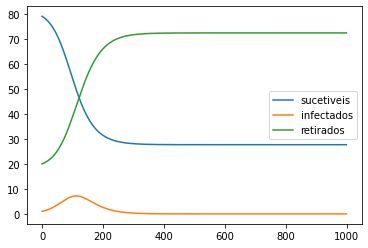

In [ ]:
N3 , S3 , I3 , R3 = func(s0=79,i0=1,r0=20,g=.5,B=1,t0=0,tf=100)
plt.plot(S3,label='sucetiveis')
plt.plot(I3,label='infectados')
plt.plot(R3,label='retirados')
plt.legend()
plt.show()

###4) Usando os dados do item 1 acima, variando apenas o parâmetro $\beta$, mostre que a infecção pode ser extinta sem que toda a população seja contaminada

In [ ]:
ListaN=[]
ListaS=[]
ListaI=[]
ListaR=[]
ListaB=[]

In [ ]:
import matplotlib.pylab as pl
cores = pl.cm.cool(np.linspace(0,1,300))

In [ ]:
for beta in np.linspace(0.1,3,300):
  N1, S1, I1 , R1 = func(99,1,0,.5,beta,0,100)
  ListaN.append(N1)
  ListaS.append(S1)
  ListaI.append(I1)
  ListaR.append(R1)
  ListaB.append(beta)
for i in range(len(ListaN)):
  plt.title('beta={}'.format(round(ListaB[i],3)))
  plt.xlim(0,200)
  plt.plot(ListaS[i], color=cores[i], ls='-', label='S')
  plt.plot(ListaI[i], color=cores[i], ls='--', label='I')
  plt.plot(ListaR[i], color=cores[i], ls='-.', label='R')
  plt.legend(loc='center right')
  plt.savefig('teste{:03d}.png'.format(i))

  plt.show()

In [ ]:
import glob
from PIL import Image

# filepaths
fp_in = "teste*.png"
fp_out = "grafico1.gif"

# https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=100, loop=0)